**scipy** is composed of task-specific sub-modules:
    scipy.cluster   Vector quantization/Kmeans
    scipy.constants   Physical and mathematical constants
    scipy.fftpack    Fourie transform
    scipy.integrate    Integration routines
    scipy.io    Data input and output
    scipy.linalg    Linear algebra routines
    scipy.ndimage   n-dimensional image package
    scipy.odr    Orthogonal distance regression
    scipy.optimize Optimization
    scipy.signal   Signal processing
    scipy.sparse   Sparse matrices
    scipy.spatial  Spatial data structures and algorithms
    scipy.special  Any special mathematical functions
    scipy.stats    Statistics
    
## 1.5.1 File input/output: scipy.io
Matlab files: Loading and saving

In [1]:
import numpy as np
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a':a})
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [2]:
from scipy import misc
misc.imread('elephant.png')
import matplotlib.pyplot as plt
plt.imread('elephant.png')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

## 1.5.2 Special functions: scipy.special
Special functions are transendental functions. The docstring of the scipy.special module is well-written, so we won't list all functions here. Frequently used ones are:
* Bessel function, such as scipy.special.jn() (nth integer order Bessel fcuntion)
* Elliptic function(scipy.special.ellipj() for the Jacobian elliptic function, ...
* Gamma function: scipy.special.gamma(), also note scipy.special.gammaln() which will give the log of Gamma to a higher numerical percision
* Erf, the area undr a Gaussian curve: schipy.special.erf()

## 1.5.3 Linear algebra operations: scipy.linalg
The scipy.linalg module provides standard linear algebra operations, relying on an underlying efficient implementation(BLAS, LAPACK).
* The scipy.linalg.det() function computes the determinant of a square matrix:

In [3]:
from scipy import linalg
import numpy as np

arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

In [4]:
arr = np.array([[3, 2], [6, 4]])
linalg.det(arr)

0.0

* The scipy.linalg.inv() function computes the inverse of a square matrix:

In [5]:
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [6]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [7]:
# Finally computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError:
arr = np.array([[3, 2], [6, 4]])
#linalg.inv(arr)

* More advanced operations are available, for example singular-value decompositon(SVD):

In [8]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

# The resulting array spectrum is :
spec

array([14.88982544,  0.45294236,  0.29654967])

In [9]:
# The original matrix can be re-composed by matrix multiplication of the outputs of svd with np.dot:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear system, are available in scipy.linalg.

## 1.5.4 Interpolation: scipy.interpolate
scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measuer exists. The module is based on the FITPACK Fortran subroutines.

By imagining experimental data close to a sine function:

In [10]:
measured_time = np.linspace(0, 1, 10)
noise = ( np.random.random(10)*2 -1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [11]:
#scipy.interpolate.interp1d cna build a linear interpolation function:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the result can be evaluated at the time of interest:

In [12]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [13]:
# A cubic interpolation can also be selected by providing the kind optional keyword argument:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

scipy.interpolate.interp2d is similar to scipy.interpolate.interp1d, but for 2-D arrays. Note that for the interp family, the interpolation points must stay within the range of given data points.

## 1.5.5 Optimization and fit: scipy.optimize
Optimization is the problem of finding a numerical solution to a minization or equality. The schipy.optimize module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.
```
from scipy import optimize
```

### 1.5.5.1 Curve fitting
Suppos we have data on a sine wave, with some noise:

In [14]:
from scipy import optimize
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First we have to define the test function to fit, here a sine with unkown amplitude and period:
```
def test_func(x, a, b):
    return a * np.sin(b *x)
```

We then use scipy.optimize.curve_fit() to find a and b:

In [15]:
def test_func(x, a, b):
    return a * np.sin(b *x)
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

optimize.curve_fit?

[2.67842941 1.49220781]


[ -5.41777502   1.28925853 -39.02151775] [[ 7.42139359e+01 -6.10776863e-02 -8.69291821e+00]
 [-6.10776863e-02  4.22135405e-02 -9.40757884e-02]
 [-8.69291821e+00 -9.40757884e-02  3.76480444e+01]]


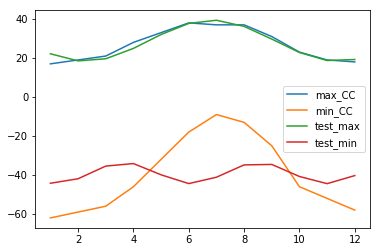

In [16]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

months = np.linspace(1,12,12)
max_CC = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_CC = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
fig = plt.figure()

plt.plot(months, max_CC, label='max_CC')
plt.plot(months, min_CC, label='min_CC')

def test_func(x, a, b, c):
    return a * np.sin(b * x) + c

params1, params_covariance1 = optimize.curve_fit(test_func, months, max_CC)
params2, params_covariance2 = optimize.curve_fit(test_func, months, min_CC)
print params2, params_covariance2
plt.plot(months, test_func(months, -10.55158444, 0.68939062,28.87409995), label='test_max')
plt.plot(months, test_func(months, -5.41777502, 1.28925853, -39.02151775), label='test_min')
plt.legend()

### 1.5.5.2 Finding the minimum of a scalar function


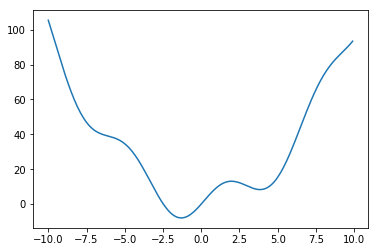

In [17]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns the location of the minimum that it has found:

In [18]:
result = optimize.minimize(f, x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [19]:
result.x

array([-1.30644012])

Methods: As the function is a smooth function, gradient-descent based methods are good options. The IBFGS algorithm is a good choice in general.

In [20]:
optimize.minimize(f, x0=0, method='L-BFGS-B')

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

Note how it cost only 12 functions evaluation above to find a good value for the minimum.

**Global minimum** : A possible issue with this approach is that, if the function has local minima, the algorithm many find these local mimima instead of teh global minimum depending on the initial point x0:

In [21]:
res = optimize.minimize(f, x0=3, method='L-BFGS-B')
res.x

array([3.83746709])

If we don't know the neighborhood of the global minimum to choose the initial point, we need to resort to constlier global optimization. To find the global minimum, we use scipy.optimize.baseinhopping() (added in version 0.12.0 of Scipy). It combines a local optimizer with sampling of starting points:

In [22]:
optimize.basinhopping(f, 0)


                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08583728]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1512
                        nit: 100
                       njev: 504
                          x: array([-1.30644001])

**Constraints**: We can connstrain the variable to the interval (0, 10) using the 'bounds' argument:

In [23]:
res = optimize.minimize(f, x0=1, bounds=((0, 10),))
res.x

array([0.])

#### Minimizing functions of several variables
To minimize over several variables, the trick is to turn them into a function of a multi-dimensional variable(a vector). See for instance the exercise on 2D minimization below.

Note: scipy.optimize.minimize_scalar() is a function with dedicated methods to minimize functions of only one variable. 

Exercise: 2-D minimization
The six-hump camelback function
$$f(x,y) = (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2$$
has multiple global and local minima. Find the global minima of this function.

Hints:
* Variables can be restricted to -2<x<2 and -1<y<1
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions
* Use scipy.optimize.minimize(), optionally trying out several of its 'methods'

Text(0.5,0.92,'Six-hump Camelback function')

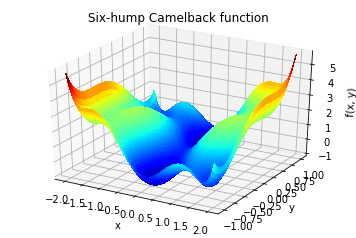

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
def f(x, y):
    return (4-2.1*x**2+x**4/3.0)*x**2 + x*y + (4*y**2-4)*y**2
    
xg, yg = np.meshgrid(x,y)
fig = plt.figure()
#plt.imshow(f(xg, yg), extent=[-2, 2, -1, 1])

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f(xg, yg), rstride=1, cstride=1, cmap=plt.cm.jet, lw=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')


### 1.5.5.3 Finding the roots of a scalar function
To find a root, i.e. a point where $f(x)=0$, of the function $f$ above we can use scipy.optimize.root():

In [25]:
root = optimize.root(f, x0=1, args=(1,)) # our initial guess is 1
root

    fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.04121206e-11])
       r: array([0.92856022])
  status: 1
 success: True
       x: array([-0.25902702])

Now that we have found the minima and roots of f and used curve fitting on it, we put all those results together in a single plot:


## 1.5.6 Statistics and random numbers: scipy.stats
The module scipy.stats contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in numpy.random.
### 1.5.6.1 Distributions: histogram and probability density function
Given observations of a random process, their histogram is an estimator of the random process's PDF (probability density function)

In [26]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [27]:
histogram = np.histogram(samples, bins=bins, normed=True)[0]
bins = 0.5 * (bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

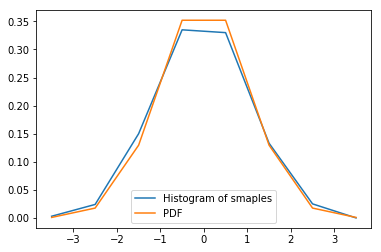

In [28]:
from scipy import stats 
pdf = stats.norm.pdf(bins)  # norm is a distribution object
plt.plot(bins, histogram, label='Histogram of smaples')
plt.plot(bins, pdf, label='PDF')
plt.legend()

If we know that the random process belongs to a given family of random processes, such as normal processes, we can do a maximum-likelihood fit of the observations to estimate the parameters of the underlying distribution. Here we fit a normal process to the observed data:

In [29]:
loc, std = stats.norm.fit(samples)
loc, std

(-0.04160713579163834, 1.0339094466137189)

### 1.5.6.2 Mean, median and percentiles

In [30]:
np.mean(samples), np.median(samples)

(-0.04160713579163834, -0.040731000141503285)

The median is also the percentile 50, because 50% of the observation are below it:

In [31]:
stats.scoreatpercentile(samples, 50), stats.scoreatpercentile(samples, 90)

(-0.040731000141503285, 1.2672244110087032)

### 1.5.6.3 Statistical tests
A statistical test is a dicision indicator. For instance, if we have two sets of observations, that we assume are generated from gaussian processes, we can a T-test to decide whether the means of two sets of observations are significantly different:

In [32]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-3.1427231322319136, pvalue=0.0021609592268355946)

## Numerical integration: scipy.integrate
### 1.5.7.1 Function integrals
The most generic integration routine is scipy.integrate.guad(). To compute $\int_{0}^{\pi/2}sin(t)dt$

In [33]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1), np.allclose(err, 1 - res)

(True, True)

### 1.5.7.2 Integrating differential equations
scipy.integrate also features routins for integrating Ordinary Differential Equations(ODE). In particular, scipy.integrate.odeint() solves ODE of the form:
```
dy/dy = rhs(y1, y2, ..., t0, ...)
```
As an introduction, let us solve the ODE $\frac{dy}{dt}=-2y$ between $t=0...4$, with the initial condition $y(t=0)=1$. First the function computing the derivative of the position needs to be defined:

In [34]:
def calc_derivative(ypos, time):
    return -2 * ypos

from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)

Let us integrate a more complex ODE: a damped spring-mass oscillator. The position of a mass attached to a spring obeys the 2nd order ODE $y'' + 2\varepsilon\omega_0 y'+\omega_0y = 0$ with $\omega_0^2 = k/m$ with $k$ the spring constant, m the mass and $\varepsilon = c/(2m\omega_0)$ with $c$ the damping coefficient. We set:

In [35]:
mass = 0.5  # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)
eps < 1

True

For **odeint()**, the 2nd equation needs to be transformed in a system of two first-order equations for the vector $Y = (y, y')$: the function computes the velocity and acceleration:

In [36]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

## 1.5.8 Fast Fourier transforms: scipy.fftpack
The scipy.fftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:
* scipy.fftpack.fft() to compute the FFT
* scipy.fftpack.fftfreq() to generate teh sampling frequencies
* scipy.fftpack.ifft() computes teh inverse FFT, from frequency space to signal space
As an illustration, a (noisy) input signal (sig), and its FFT:
```
from scipy import fftpack
sig_fft = fftpack.fft(sig)
freqs = fftpack.fftfreq(sig.size, d=time_step)
```

As the signal comes from a real function, the Fourier transform is symmetric.
The peak signal frequency can be found with *freqs[power.argmax()]* 
Setting the Fourrier component above this frequency to zero and inverting the FFT with scipy.fftpack.ifft(), gives a filtered signal.


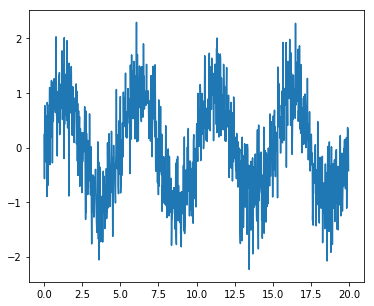

In [37]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

# Seed the random number generator
np.random.seed(1234)
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi/period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

3

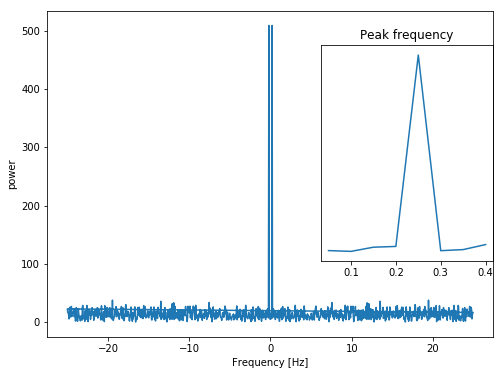

In [38]:
## Compute and plot the power
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.60, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced peak detection
power[pos_mask].argmax()

### Remove all the high frequencies
we now remove all the high frequencies and transform back from frequencies to signal.

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


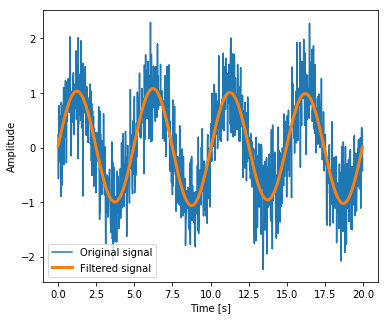

In [39]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, lw=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

In [40]:
# Crude periodicity finding
import numpy as np
data = np.loadtxt('data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

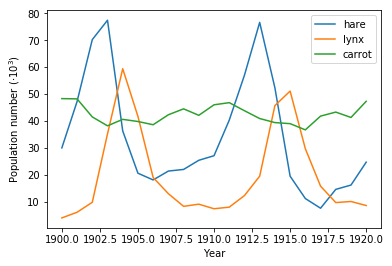

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


Text(0,0.5,'Power ($\\cdot10^3$)')

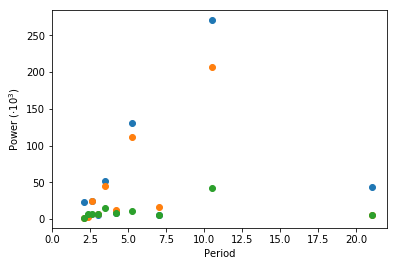

In [42]:
# plot its periods
from scipy import fftpack

ft_populations = fftpack.fft(populations, axis=0)
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')



In [43]:
from scipy import fftpack
import numpy as np
import pylab
import matplotlib.pyplot as plt

Text(0.5,1,'Original image')

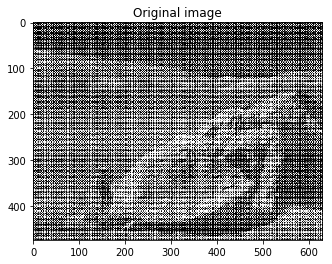

In [44]:
img = pylab.imread('data/moonlanding.png')
plt.figure()
plt.imshow(img, plt.cm.gray)
plt.title('Original image')

Text(0.5,1,'Fourier transform')

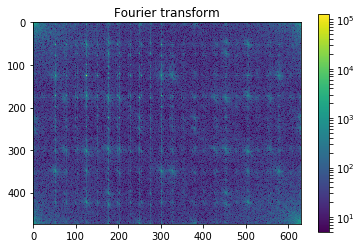

In [45]:
im_fft = fftpack.fft2(img)

from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

Text(0.5,1,'Filtered Spectrum')

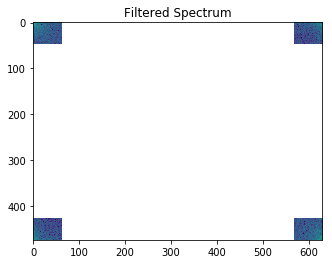

In [46]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')

Text(0.5,1,'Reconstructed Image')

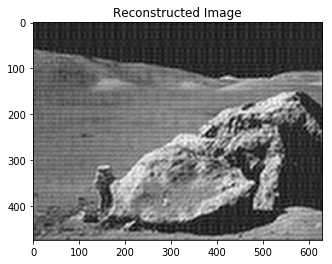

In [47]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')


Text(0.5,1,'Blurred image')

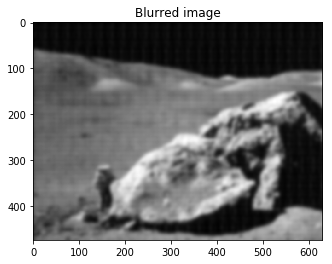

In [48]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(img, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')


##  1.5.9 Signal processing: scipy.signal
scipy.signal is for typical signal processing: 1D, regularly-sampled signals
    **Resampling**     scipy.signal.resample()  
 resample a signal to n points using FFT

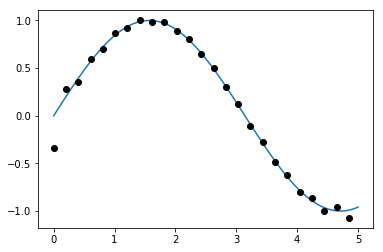

In [49]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)
plt.plot(t, x)

plt.plot(t[::4], x_resampled, 'ko')

**Detrending**  scipy.signal.detrend(): remove linear trend from signal:

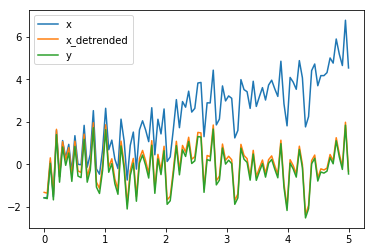

In [50]:
t = np.linspace(0, 5, 100)
y = np.random.normal(size=100)
x = t + y

from scipy import signal
x_detrended = signal.detrend(x)
plt.plot(t, x, label='x')
plt.plot(t, x_detrended, label='x_detrended')
plt.plot(t, y, label='y')
plt.legend()

**Filtering**: For non-linear filtering, scipy.signal has filtering (median filter scipy.signal.medfilt(), Wiener scipy.signal.wiener()), but we will discuss this in the image section.
scipy.signal also has a full-blown set of tools for the design of linear filter(finite and infinite response filters), but this is out of the scope of this tutorial.

**Spectral analysis**: scipy.signal.spectrogram() compute a spectrogram -frequency spectrums over consecutive time windows-, while scipy.signal.welch() comptes a power spectrum density(PSD)

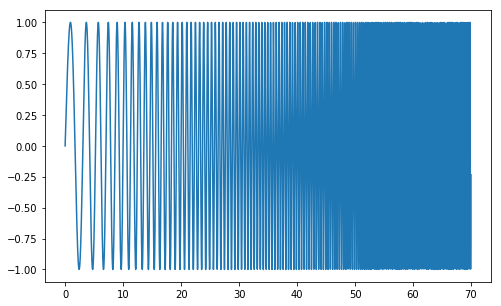

In [51]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
time_step = 0.01
time_vec = np.arange(0, 70, time_step)

sig = np.sin(0.5 * np.pi * time_vec * (1 + 0.1* time_vec))
plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

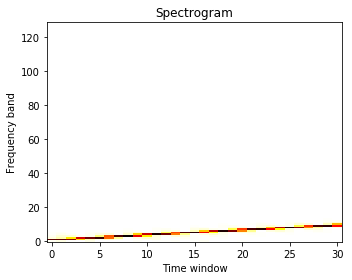

In [52]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig)
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

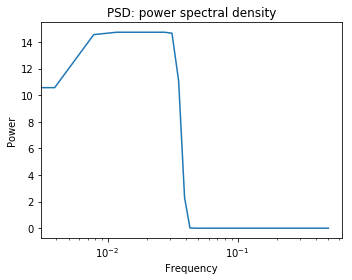

In [53]:
freqs, psd = signal.welch(sig)
plt.figure(figsize=(5,4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

## 1.5.10 Image manipulation: scipy.ndimage
scipy.ndimage provides manipulation of n-dimensional arrays as images
### 1.5.10.1 Geometrical transformation on images
Changing orientation, resolution

In [54]:
from scipy import misc  # Load an image
face = misc.face(gray=True)

from scipy import ndimage
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

(-0.5, 2047.5, 1535.5, -0.5)

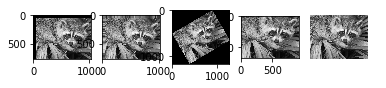

In [55]:
plt.subplot(1,5,1)
plt.imshow(shifted_face, cmap=plt.cm.gray)

plt.subplot(1,5,2)
plt.imshow(shifted_face2, cmap=plt.cm.gray)

plt.subplot(1,5,3)
plt.imshow(rotated_face, cmap=plt.cm.gray)

plt.subplot(1,5,4)
plt.imshow(cropped_face, cmap=plt.cm.gray)

plt.subplot(1,5,5)
plt.imshow(zoomed_face, cmap=plt.cm.gray)

plt.axis('off')

### 1.5.10.2 Image filtering
Generate a noisy face:

In [56]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]

import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)


In [57]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5,5))

(-0.5, 511.5, 511.5, -0.5)

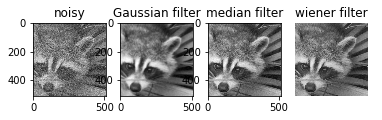

In [58]:
plt.subplot(1,4,1)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.title('noisy')

plt.subplot(1,4,2)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.title('Gaussian filter')

plt.subplot(1,4,3)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.title('median filter')

plt.subplot(1,4,4)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('wiener filter')

plt.axis('off')

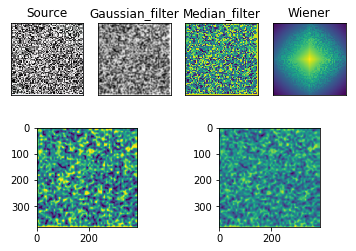

In [59]:
## test the genome.fa data 
## put the ATCG to binary-data image, 00-A / 01-T / 10-C / 11-G
## the output shows that is  the Gussian-noisy data

from scipy import misc,ndimage, signal
import pylab
import numpy as np

gene_img = pylab.imread("./webwxgetmsgimg.jpeg")
gene2_img = np.copy(gene_img).astype(np.float64)

## RGB convert to gray
def Rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

gene_img2 = Rgb2gray(gene2_img)

blurred_gene = ndimage.gaussian_filter(gene_img2, sigma=3)
median_gene = ndimage.median_filter(gene_img2, size=5)
wiener_gene = signal.wiener(gene_img2, gene_img2.shape)

plt.subplot(2,4,1)
plt.imshow(gene_img, cmap=plt.cm.gray)
plt.title('Source')
plt.xticks([])
plt.yticks([])

plt.subplot(2,4,2)
plt.imshow(blurred_gene, cmap=plt.cm.gray)
plt.title('Gaussian_filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 3)
plt.imshow(median_gene)
plt.title('Median_filter')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 4)
plt.imshow(wiener_gene)
plt.title('Wiener')
plt.xticks([])
plt.yticks([])

import sklearn.preprocessing as sk_preprocessing

scaler = sk_preprocessing.StandardScaler().fit(blurred_gene)
new_img = scaler.transform(blurred_gene)

# normalization to a range
scaler = sk_preprocessing.MinMaxScaler(feature_range=(0, 255)).fit(new_img)
new_img2 = scaler.transform(new_img)

plt.subplot(2,2,3)
plt.imshow(new_img2)
plt.subplot(2, 2, 4)
plt.imshow(new_img)

### 1.5.10.3 Mathematical morphology
Mathematical morphology stems from set theory. It characterizes and transforms geometrical structures. Binary (black and white) images, in particular, can be transformed using this theory: the sets to be transformed are the sets of neighboring non-zero-valued pixels. The theory was also extended to gray-valued images.

In [60]:
el = ndimage.generate_binary_structure(2,1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [61]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

* Erosion scipy.ndimage.binary_eroson()

In [62]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [63]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

* Dilation scipy.ndimage.binary_dilation()

In [64]:
a = np.zeros((5, 5))
a[2, 2] = 1 
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [65]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

* Opening scipy.ndimage.binary_opening()

In [66]:
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [67]:
# Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [68]:
# Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

* Closing: scipy.ndimage.binary_closing()

An opening operation removes small structures, while a closing operation fills small holes. Such operations can therefore be used to 'clean' an image.

In [69]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a >= 0.5

opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)


(-0.5, 49.5, 49.5, -0.5)

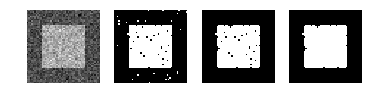

In [70]:
plt.subplot(1, 4, 1)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.axis('off')



In [71]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 1:6] = 3
a[4, 4] = 2
a[2, 3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [72]:
ndimage.grey_erosion(a, size=(3,3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

### 1.5.10.4 Connected components and measurements on images

In [73]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * ( 1+x*y/50.**2)**2
mask = sig > 1

scipy.ndimage.label() assigns a different label to each connected component:

In [74]:
labels, nb = ndimage.label(mask)
nb

8

In [75]:
areas = ndimage.sum(mask, labels, range(1, labels.max() +1))
areas

array([190.,  45., 424., 278., 459., 190., 549., 424.])

In [76]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima

array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

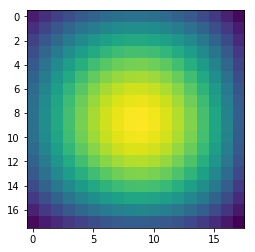

In [77]:
ndimage.find_objects(labels==4)
sl = ndimage.find_objects(labels==4)
from matplotlib import pyplot as plt
plt.imshow(sig[sl[0]])

## 1.5.11 Summary exercises on scientific computing
The summary exercises use mainly Numpy, Scipy and Matplotlib. They provide some real-life example of scientific computing with Python.Now that the basics of working with Numpy and Ccipy have been introduced, the interested user is invited to try these exercises.
### 1.5.11.1 Maximum wind speed prediction at the Sprogo station
The exercise goal is to predict the maximum wind speed occuring every 50 years even if no measure exists for such a period. The availbel data are only measured over 21 years at the Sprogo meteorological station located in Denmark. First, the statistical steps will be fiben and then illustrated with functions from the scipy.interpolate module. At the end the interested readers are invited to compute results from raw data and in a slightly different approach.

### Statistical approach
The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occuring every 50 years requires the opposite approch, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occuring every 50 years is defined as the  upper 2% quantile.
### Computing the cumulative probabilities

In [78]:
# load the annual wind speeds maxima
import numpy as np
max_speeds = np.load('scipy-lecture-notes/intro/summary-exercises/examples/max-speeds.npy')
years_nb = max_speeds.shape[0]

In [79]:
cprob = (np.arange(years_nb, dtype=np.float32) + 1) / (years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)

### Prediction with UniveriateSpline
In this section the quantile function will be estimated by using the UnivariateSpline class which can represent a spline from points. The default behavior is to build a spline of degree 3 and points can have different weights according to their reliability. Variants are InterpolatedUniveriateSpline and LSQUnivariateSpline on which errors checking is going to chang. In case a 2D spline is wanted, the BivariateSpline class family is provided. All those classes for 1D and 2D splines use the FITPACK Fortran subroutines, that's why a lower library access is available through the splrep and splev use of FITPACK parameters are also provided for simpler use(see interp1d, interp2d, barycentric_interpolate and so on).

In [80]:
from scipy.interpolate import UnivariateSpline
quantile_func = UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 1e2)
fitted_max_speeds = quantile_func(nprob)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
fifty_wind

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


array(32.97989825)

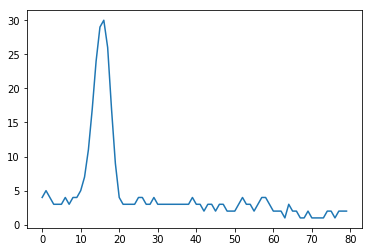

In [81]:
## Non linear least squares curve fitting: application to point extraction in topographical lidar data
# loading and visualization
import numpy as np
waveform_1 = np.load('data/waveform_1.npy')

import matplotlib.pyplot as plt
t = np.arange(len(waveform_1))
plt.plot(t, waveform_1)

A Gaussian function defined by
$$B + Aexp(-(\frac{t-\mu}{\sigma})^2)$$
Where:
* coeffs[0] is B(noise)
* coeffs[1] is A(amplitude)
* coeffs[2] is $\mu$(center)
* coeffs[3] is $\sigma$(width)

In [82]:
def model_gaussian(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp(-((t-coeffs[2])/coeffs[3])**2)

In [83]:
# Initial solution
x0 = np.array([3, 30, 15, 1], dtype=float)

**Fit** : scipy.optimize.leastsq minimize the sum of squares of the function given as an argument.
Basically, the function to minimize is the residuals (the difference between the data and the model)
So let's the get our solution by calling scipy.optimize.leastsq() with the following arguments:
* the function to minimize
* an initial solution
* the additional arguments to pass to the function

In [84]:
def residuals(coeffs, y, t):
    return y - model_gaussian(t, coeffs)

from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(waveform_1, t))
print(x)

[ 2.70363341 27.82020742 15.47924562  3.05636228]


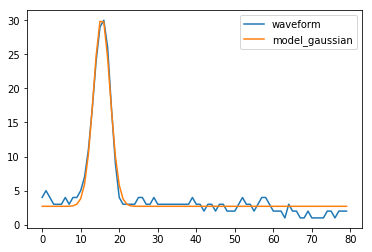

In [85]:
plt.plot(t, waveform_1, t, model_gaussian(t, x))
plt.legend(['waveform', 'model_gaussian'])

In [86]:
from scipy.optimize import curve_fit

#y = curve_fit(model_gaussian, t, waveform_1)

### 1.5.11.4 Example of solution for the image processing exercise: unmolten grains in glass
1. image file MV_HFV_012.jpg and display it. Browse through the keyword argument in the docstring imshow to display the image with the 'right' orientation(origin in the bottom left corner, upper left corner as for standard arrays).
2. crop to remove the lower panel with measure information
3. Slightly filter the image with a median filter in order to refine its histogram. Check how the histogram changes.

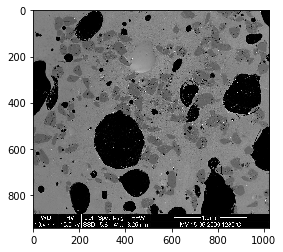

In [105]:
import numpy as np
import pylab as pl
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

dat = pl.imread('data/MV_HFV_012.jpg')
plt.imshow(dat, cmap=plt.cm.gray)
data = dat[:-60]

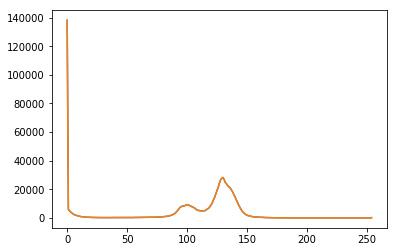

In [120]:
filtdata = ndimage.median_filter(data, size=(7,7))
hi_data = np.histogram(data, bins=np.arange(256))
hi_filtdata = np.histogram(filtdata, bins=np.arange(256))

fig = plt.figure()
plt.plot(hi_data[1][0:-1], hi_data[0], hi_filtdata[1][:-1], hi_data[0])

In [121]:
# Using the histogram of the filtered image, determin thresholds that allow to define masks for sand pixel, glass pixels and bubble pixels.
void = filtdata <= 50
sand = np.logical_and(filtdata > 50, filtdata <= 114)
glass = filtdata > 114

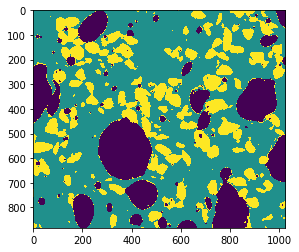

In [127]:
# Display an image in which the three phases are colored with three different colors
phases = void.astype(np.int) + 2*glass.astype(np.int) + 3*sand.astype(np.int)
plt.imshow(phases)

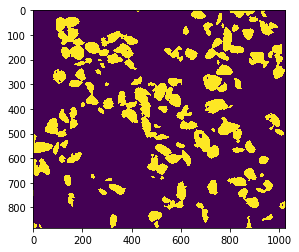

In [140]:
# use mathematical morphology to clean the different phases
sand_op = ndimage.binary_opening(sand, iterations=2)

# Attribute labels to all bubbles and sand grains, and remove from the sand mask grains that are
# smaller than 10 pixels. To do so, use ndimage.sum or np.bincount to compute the grain sizes.
sand_labels, sand_nb = ndimage.label(sand_op)
sand_areas = np.array(ndimage.sum(sand_op, sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas > 100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)
#plt.imshow(mask)
plt.imshow(remove_small_sand)

In [141]:
#compute the mean size of bubbles
bubbles_labels, bubbles_nb = ndimage.label(void)
bubbles_areas = np.bincount(bubbles_labels.ravel())[1:]
mean_bubble_size = bubbles_areas.mean()
median_bubble_size = np.median(bubbles_areas)
mean_bubble_size, median_bubble_size

(1699.875, 65.0)

### 1.5.12.1 Finding the minimum of a smooth funciton
Demos various methods to find the minimum of a function.

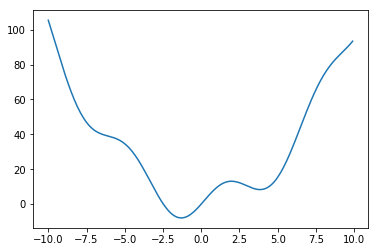

In [144]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [145]:
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0))

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


In [146]:
optimize.minimize(f, x0=0, method='L-BFGS-B')

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

### 1.5.12.2 Detrending a signal
scipy.signal.detrend() removes a linear trend.

In [149]:
import numpy as np
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

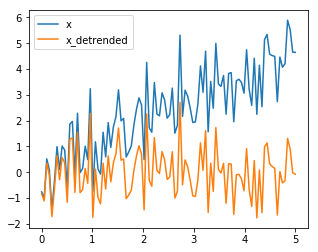

In [150]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(t, x, label='x')
plt.plot(t, x_detrended, label='x_detrended')
plt.legend(loc='best')

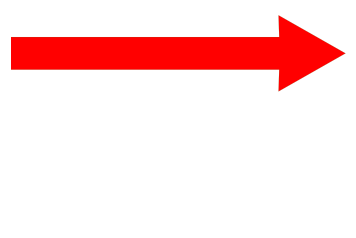

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot()
#ax.annotate("Text", xy=(0.5,0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))


plt.xticks([])
plt.yticks([])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

ax.arrow(0,0.8,1,0, width=0.15, length_includes_head=True, head_width=0.35, head_length=0.2, clip_box='aa',ec='green',
        fc='red',linestyle='--',linewidth=0.1, capstyle='projecting', overhang=0.01,)


In [ ]:
#1.